In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# import results files
epidural = pd.read_csv('label_files/Results_Epidural Hemorrhage Detection_2020-11-16_21.31.26.148.csv')
intraparenchymal = pd.read_csv('label_files/Results_Intraparenchymal Hemorrhage Detection_2020-11-16_21.39.31.268.csv')
multiple = pd.read_csv('label_files/Results_Multiple Hemorrhage Detection_2020-11-16_21.36.24.018.csv')
subarachnoid = pd.read_csv('label_files/Results_Subarachnoid Hemorrhage Detection_2020-11-16_21.36.18.668.csv')
subdural = pd.read_csv('label_files/Results_Subdural Hemorrhage Detection_2020-11-16_21.37.19.745.csv')

In [3]:
def clean_labels(raw_data, hem_type):
    
    # choose best position label
    for i in range(len(raw_data)):
        row = raw_data.loc[i]
        if pd.isna(raw_data.loc[i,'Correct Label']):
            label = raw_data.loc[i,'Majority Label']
        else:
            label = raw_data.loc[i,'Correct Label']
        raw_data.loc[i,'Label'] = label
    
    # give overall type label
    raw_data['hem_type'] = hem_type
    
    # drop rows with no labels
    cleaned = raw_data[raw_data['Label'].str.contains('x')]
    return cleaned

In [4]:
# clean and assign labels
epi = clean_labels(epidural, "epidural")
intra = clean_labels(intraparenchymal, "intraparenchymal")
multi = clean_labels(multiple, "multiple")
suba = clean_labels(subarachnoid, "subarachnoid")
subd = clean_labels(subdural, "subdural")

In [5]:
# combine all label files
types_list = [epi, intra, multi, suba, subd] #, multi, suba, subd
a_labels = pd.concat(types_list)

# drop flagged rows
a_labels = a_labels.loc[a_labels['Labeling State'] != 'Flagged']
a_labels.reset_index(inplace=True)

#all_labels.to_csv('all_labels.csv')
a_labels

,index,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes,Label,hem_type
0,0,1196514,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",epidural
1,1,1196682,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",epidural
2,2,1196477,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",epidural
3,3,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",epidural
4,4,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",epidural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,738,1198392,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.68359375, ""y"": 0.42578125}, {""x"": 0.6...",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",subdural
4643,739,1198392,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.630859375, ""y"": 0.24609375}, {""x"": 0....",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",subdural
4644,740,1198414,ID_ff2f3dbb7.jpg,https://go.centaurlabs.com/problem/1198414,Labeled,"['[{""x"": 0.70854944, ""y"": 0.6837957}, {""x"": 0....",14.0,6.0,"[{""x"": 0.70703125, ""y"": 0.67578125}, {""x"": 0.7...",1.0,"[[{'x': 0.70703125, 'y': 0.67578125}, {'x': 0....",0.15,0.153092,NaN,NaN,"[[{'x': 0.70703125, 'y': 0.67578125}, {'x': 0....",subdural
4645,741,1198334,ID_04ab5246e.jpg,https://go.centaurlabs.com/problem/1198334,Labeled,"['[{""x"": 0.56073856, ""y"": 0.6705539}, {""x"": 0....",13.0,6.0,[],0.0,"[[{'x': 0.560546875, 'y': 0.669921875}, {'x': ...",0.33,0.833333,NaN,NaN,"[[{'x': 0.560546875, 'y': 0.669921875}, {'x': ...",subdural


In [6]:
#data = np.zeros([1838, (512*512)])

a_labels.loc[:,'hem_type'].value_counts()

intraparenchymal    1262
multiple            1047
subarachnoid        1028
subdural             734
epidural             576
Name: hem_type, dtype: int64

In [7]:
# add normal images
norm = pd.read_csv('normal_labels/test35.csv')
norm = norm.T.reset_index().rename(columns={'index':'Origin'})
norm['hem_type'] = 'normal'
norm['Origin'] = norm['Origin'].apply(lambda x: x.replace(' ', ''))

In [8]:
# Empty array to fill with images
all_labels = pd.concat([a_labels, norm]).reset_index()
data = np.zeros([(len(all_labels)), (512*512)])

# Select image type
image_type = 'brain_bone_window'
# Open files and load into array
for n, file_name in enumerate(all_labels.Origin):
    folder = all_labels.loc[n,'hem_type']
    file_dir = f'{folder}/{image_type}/{file_name}'
    try:
        data[n,:] = np.mean(matplotlib.image.imread(file_dir),axis=2).reshape(-1)
    except:
        continue
# Now we can use the file name to read the data

In [9]:
len(all_labels)

7313

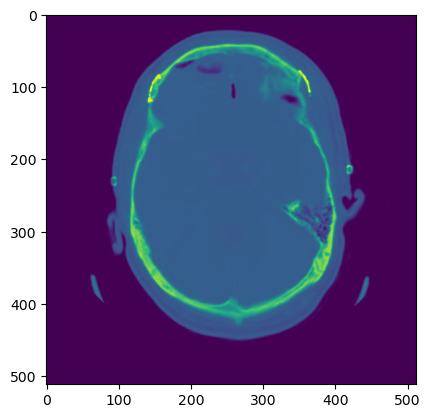

In [10]:
plt.imshow(data[15].reshape(512,512))

In [11]:
y = all_labels.loc[:,'hem_type']

from sklearn.model_selection import train_test_split

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, random_state=0)
print(y_train.shape, y_test.shape)

(6581,) (732,)


Text(0.5, 1.0, 'normal')

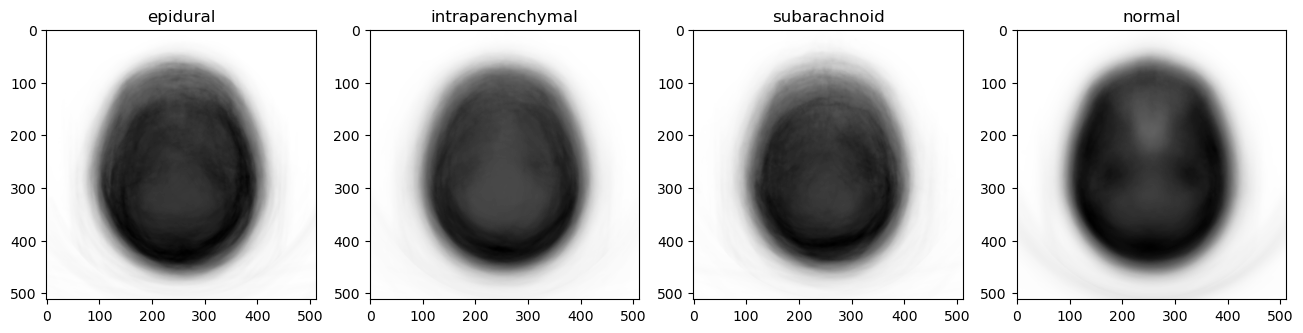

In [12]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

ax0.imshow(X_train[y_train == 'epidural'].mean(0).reshape(512,512), cmap='Greys')
ax0.set_title('epidural')
ax1.imshow(X_train[y_train == 'intraparenchymal'].mean(0).reshape(512,512), cmap='Greys')
ax1.set_title('intraparenchymal')
ax2.imshow(X_train[y_train == 'subarachnoid'].mean(0).reshape(512,512), cmap='Greys')
ax2.set_title('subarachnoid')
ax3.imshow(X_train[y_train == 'normal'].mean(0).reshape(512,512), cmap='Greys')
ax3.set_title('normal')

In [13]:
from sklearn.linear_model import LogisticRegression

# fit logistic regression to flattened/label-processed data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# print score on the test data
print("Logistic Regression Score: %.4f"%clf.score(X_test,y_test))

/Users/dpogrebitskiy/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Score: 0.5301


/Users/dpogrebitskiy/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


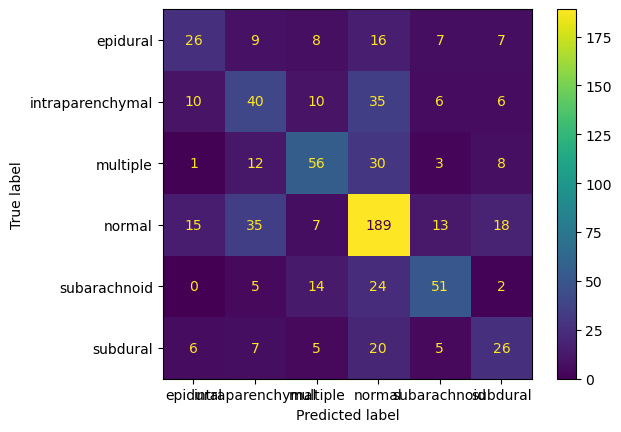

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

In [18]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Build nn model with 3 layers
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(512*512,)))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

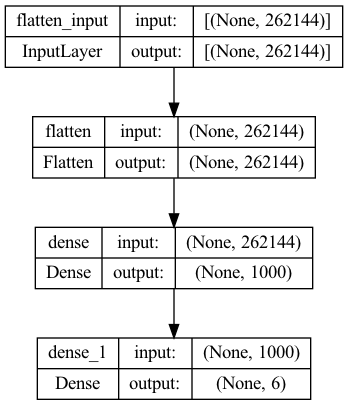

In [19]:
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model, "nn_v1.png", show_shapes=True)

In [20]:
from keras.utils import np_utils

# Make dummies for labels
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

# compile model and fit
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
206/206 [==============================] - 158s 739ms/step - loss: 3895.3745 - accuracy: 0.3085 - val_loss: 450.2683 - val_accuracy: 0.3333
Epoch 2/20
206/206 [==============================] - 146s 703ms/step - loss: 220.5432 - accuracy: 0.3369 - val_loss: 44.7051 - val_accuracy: 0.1516
Epoch 3/20
206/206 [==============================] - 145s 705ms/step - loss: 6.2643 - accuracy: 0.3466 - val_loss: 6.3224 - val_accuracy: 0.3784
Epoch 4/20
206/206 [==============================] - 144s 700ms/step - loss: 2.2357 - accuracy: 0.3636 - val_loss: 1.9591 - val_accuracy: 0.3784
Epoch 5/20
206/206 [==============================] - 144s 700ms/step - loss: 1.7488 - accuracy: 0.3635 - val_loss: 6.5991 - val_accuracy: 0.3784
Epoch 6/20
206/206 [==============================] - 144s 701ms/step - loss: 7.2480 - accuracy: 0.3620 - val_loss: 1.6727 - val_accuracy: 0.3798
Epoch 7/20
206/206 [==============================] - 143s 696ms/step - loss: 2.2399 - accuracy: 0.3635 - val_loss: 

In [21]:
DS =  16

N_train = y_train.shape[0]  # The length of the training data
y_train = np.array(y_train)

im_size = int(262144/DS)

data1 = np.zeros([len(all_labels), im_size])

for i, row in enumerate(data):
    data1[i,:] = row[::DS]            # Downsample the image

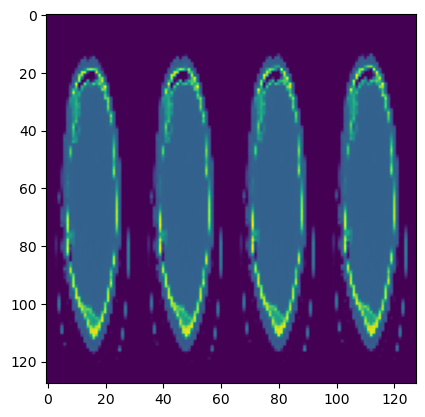

In [22]:
plt.imshow(data1[1500].reshape(128,128))

In [23]:

X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(5850,) (1463,)


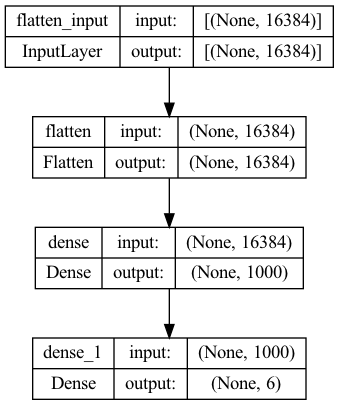

In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(128*128,)))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

keras.utils.plot_model(model, "nn_v2.png", show_shapes=True)

In [25]:
from keras.utils import np_utils

NUM_LABELS = 4
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
183/183 [==============================] - 11s 57ms/step - loss: 356.6736 - accuracy: 0.2978 - val_loss: 41.0615 - val_accuracy: 0.2755
Epoch 2/20
183/183 [==============================] - 9s 49ms/step - loss: 27.6424 - accuracy: 0.3643 - val_loss: 21.1356 - val_accuracy: 0.2953
Epoch 3/20
183/183 [==============================] - 9s 52ms/step - loss: 10.8391 - accuracy: 0.3668 - val_loss: 1.8008 - val_accuracy: 0.1408
Epoch 4/20
183/183 [==============================] - 9s 50ms/step - loss: 2.3778 - accuracy: 0.3508 - val_loss: 4.9003 - val_accuracy: 0.3807
Epoch 5/20
183/183 [==============================] - 10s 56ms/step - loss: 2.5139 - accuracy: 0.3617 - val_loss: 2.2733 - val_accuracy: 0.3835
Epoch 6/20
183/183 [==============================] - 10s 53ms/step - loss: 1.8303 - accuracy: 0.3646 - val_loss: 1.6684 - val_accuracy: 0.3869
Epoch 7/20
183/183 [==============================] - 10s 54ms/step - loss: 1.6652 - accuracy: 0.3632 - val_loss: 1.8018 - val_accura

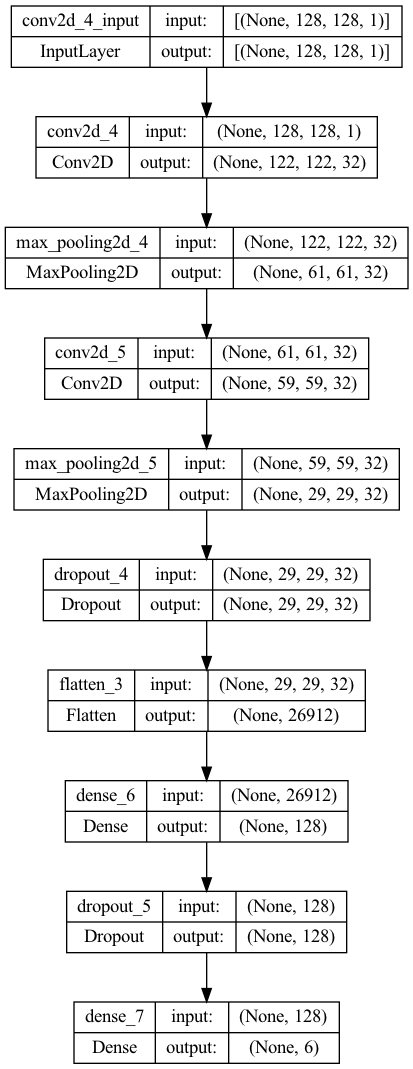

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(128,128,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
keras.utils.plot_model(model, "cnn_v1.png", show_shapes=True)

In [36]:
X_train = X_train.reshape(-1,128,128,1)
X_test = X_test.reshape(-1,128,128,1)
history = model.fit(X_train,
                    Y_train,
                    epochs=30,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/30
46/46 [==============================] - 30s 638ms/step - loss: 10.1311 - accuracy: 0.2997 - val_loss: 1.6083 - val_accuracy: 0.3841
Epoch 2/30
46/46 [==============================] - 27s 577ms/step - loss: 1.6368 - accuracy: 0.3696 - val_loss: 1.5747 - val_accuracy: 0.3958
Epoch 3/30
46/46 [==============================] - 27s 577ms/step - loss: 1.5820 - accuracy: 0.3807 - val_loss: 1.5351 - val_accuracy: 0.4053
Epoch 4/30
46/46 [==============================] - 27s 585ms/step - loss: 1.5241 - accuracy: 0.3954 - val_loss: 1.5142 - val_accuracy: 0.4252
Epoch 5/30
46/46 [==============================] - 27s 580ms/step - loss: 1.4771 - accuracy: 0.4120 - val_loss: 1.4633 - val_accuracy: 0.4539
Epoch 6/30
46/46 [==============================] - 27s 584ms/step - loss: 1.4211 - accuracy: 0.4427 - val_loss: 1.4292 - val_accuracy: 0.4668
Epoch 7/30
46/46 [==============================] - 27s 582ms/step - loss: 1.3673 - accuracy: 0.4656 - val_loss: 1.3976 - val_accuracy: 0.483

In [ ]:
import os

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "convolution_logs", "run_{:03d}".format(run_index))

early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cnn.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train,
                    Y_train,
                    epochs=1000,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, Y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/1000
46/46 [==============================] - 37s 812ms/step - loss: 0.4833 - accuracy: 0.8080 - val_loss: 1.2464 - val_accuracy: 0.6842
Epoch 2/1000
46/46 [==============================] - 33s 704ms/step - loss: 0.4897 - accuracy: 0.8092 - val_loss: 1.2486 - val_accuracy: 0.6931
Epoch 3/1000
46/46 [==============================] - 31s 677ms/step - loss: 0.4902 - accuracy: 0.8085 - val_loss: 1.2905 - val_accuracy: 0.6835
Epoch 4/1000
46/46 [==============================] - 31s 683ms/step - loss: 0.4702 - accuracy: 0.8174 - val_loss: 1.2597 - val_accuracy: 0.6938
Epoch 5/1000
46/46 [==============================] - 31s 682ms/step - loss: 0.4564 - accuracy: 0.8202 - val_loss: 1.2819 - val_accuracy: 0.6822
Epoch 6/1000
46/46 [==============================] - 31s 684ms/step - loss: 0.4494 - accuracy: 0.8234 - val_loss: 1.3082 - val_accuracy: 0.6712
Epoch 7/1000
46/46 [==============================] - 31s 681ms/step - loss: 0.4407 - accuracy: 0.8279 - val_loss: 1.3585 - val_ac